# physical setup


## basic  setup

In [1]:
from jetset.jet_model import Jet
my_jet=Jet(name='test',electron_distribution='lppl',)

In [2]:
Jet.available_electron_distributions()

lp: log-parabola
pl: powerlaw
lppl: log-parabola with low-energy powerlaw branch
lpep: log-parabola defined by peak energy
plc: powerlaw with cut-off
bkn: broken powerlaw
spitkov: spitkov
lppl_pile_up: log-parabola with low-energy powerlaw branch and pile-up
bkn_pile_up: broken powerlaw and pileup


In [3]:
my_jet.show_pars()

      name             par type           units             val         phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- ------------------ ---------------- ------------------ ----- ------
               N    electron_density         1 / cm3              100.0              0.0               None False  False
            gmin  low-energy-cut-off lorentz-factor*                2.0              1.0       1000000000.0 False  False
            gmax high-energy-cut-off lorentz-factor*          1000000.0              1.0 1000000000000000.0 False  False
               s   LE_spectral_slope                                2.0            -10.0               10.0 False  False
               r  spectral_curvature                                0.4            -15.0               15.0 False  False
gamma0_log_parab    turn-over-energy lorentz-factor*            10000.0              1.0       1000000000.0 False  False
               R         region_

In [4]:
my_jet.parameters.par_table

name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
str16,str19,object,float64,float64,object,bool,bool
N,electron_density,1 / cm3,100.0,0.0,None,False,False
gmin,low-energy-cut-off,lorentz-factor*,2.0,1.0,1000000000.0,False,False
gmax,high-energy-cut-off,lorentz-factor*,1000000.0,1.0,1000000000000000.0,False,False
s,LE_spectral_slope,,2.0,-10.0,10.0,False,False
r,spectral_curvature,,0.4,-15.0,15.0,False,False
gamma0_log_parab,turn-over-energy,lorentz-factor*,10000.0,1.0,1000000000.0,False,False
R,region_size,cm,15.698970004336019,0.0,30,True,False
R_H,region_position,cm,1e+17,0.0,None,False,False
B,magnetic_field,G,0.1,0.0,None,False,False


this means that you can easily convert the values in the table using the units module of astropy. **Please note, that the table is built on the fly from the**  :class:`.ModelParameterArray **and each modificatio you do to this table will not be reflected on the actual parameters values**

In [5]:
my_jet.show_model()


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: test  

electron distribution:
 type: lppl  
 electron energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  50
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

      name             par type           units             val         phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- ------------------ ---------------- -----

## setting the parameters

In [6]:
my_jet.set_par('B',val=0.2)
my_jet.set_par('gamma0_log_parab',val=5E3)
my_jet.set_par('gmin',val=1E2)
my_jet.set_par('gmax',val=1E8)
my_jet.set_par('R',val=14.5)
my_jet.set_par('N',val=1E3)

In [7]:
my_jet.parameters.B.val=0.2
my_jet.parameters.r.val=0.4

## investigating the electron distribution

In [8]:
my_jet.show_electron_distribution()

-------------------------------------------------------------------------------------------------------------------
electron distribution:
 type: lppl  
 electron energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06

      name             par type           units          val     phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- ----------- ---------------- ------------------ ----- ------
               B      magnetic_field               G         0.2              0.0               None False  False
               N    electron_density         1 / cm3      1000.0              0.0               None False  False
               R         region_size              cm        14.5              0.0                 30  True  False
             R_H     region_position              cm       1e+17              0.0               None False  False
        beam_obj             beaming Lorentz-factor*        10.0           0

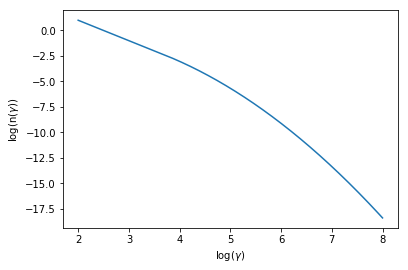

In [9]:
p=my_jet.electron_distribution.plot()

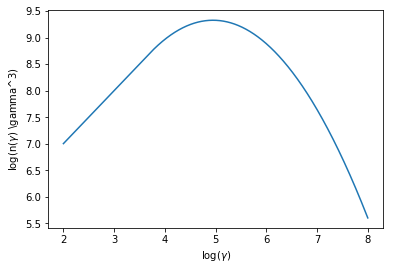

In [10]:
p=my_jet.electron_distribution.plot3p()

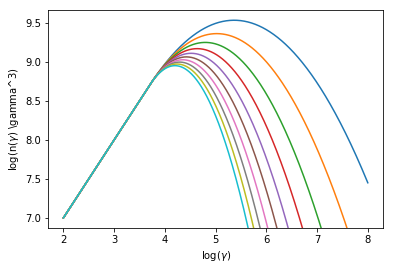

In [11]:
import numpy as np
p=None
for r in np.linspace(0.3,1,10):
    my_jet.parameters.r.val=r
    if p is None:
        p=my_jet.electron_distribution.plot3p()
    else:
        p=my_jet.electron_distribution.plot3p(p)

###  using log values for electron distribution parameters

In [12]:
my_jet=Jet(name='test',electron_distribution='lppl',electron_distribution_log_values=True)
my_jet.show_model()


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: test  

electron distribution:
 type: lppl  
 electron energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  50
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

      name             par type           units             val         phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------------ ---------------- -------

## evaluate and plot  the model


At this point we can evaluate the  emission for this jet model using the instruction

In [13]:
my_jet.eval()

In [14]:
my_jet.show_pars()

      name             par type           units             val         phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------------ ---------------- ---------------- ----- ------
               N    electron_density         1 / cm3              100.0              0.0             None False  False
            gmin  low-energy-cut-off lorentz-factor* 0.3010299956639812              0.0              9.0  True  False
            gmax high-energy-cut-off lorentz-factor*                6.0              0.0             15.0  True  False
               s   LE_spectral_slope                                2.0            -10.0             10.0 False  False
               r  spectral_curvature                                0.4            -15.0             15.0 False  False
gamma0_log_parab    turn-over-energy lorentz-factor*                4.0              0.0              9.0  True  False
               R         region_size            

and plot the corresponding SED:


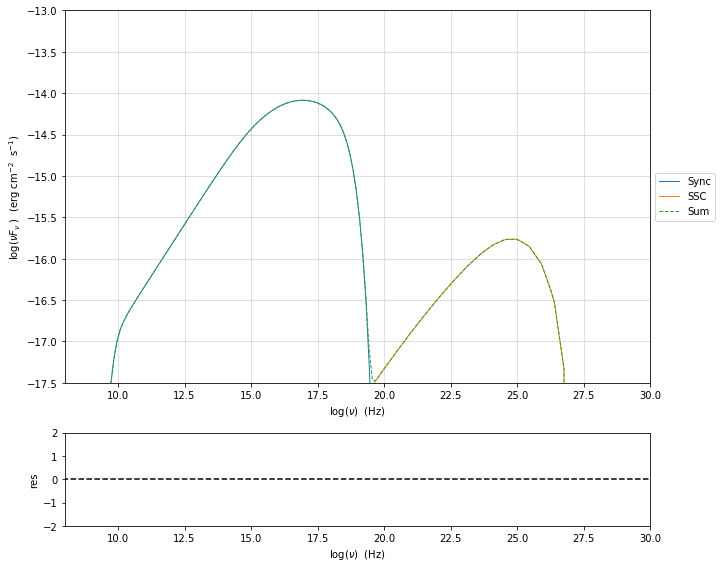

In [15]:
from jetset.plot_sedfit import PlotSED
my_plot=PlotSED()
my_jet.plot_model(plot_obj=my_plot)
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

alternatively, you can call the ``plot_model`` method without passing a ``Plot`` object

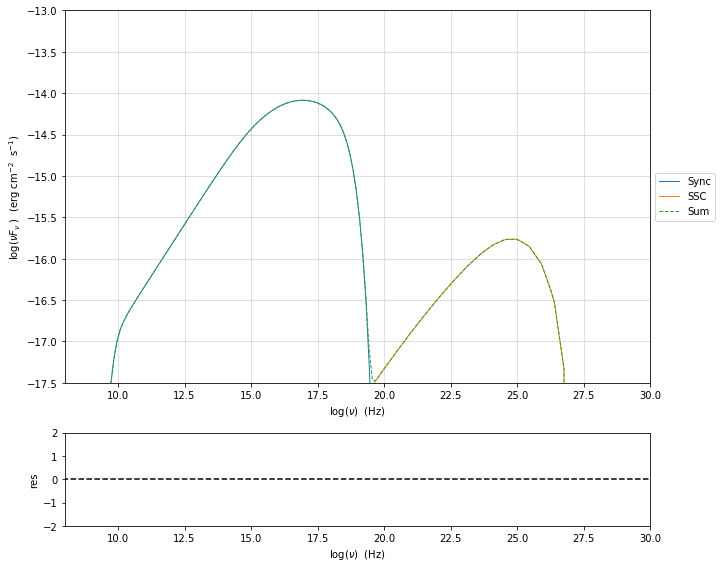

In [16]:
my_plot=my_jet.plot_model()
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

In [17]:
my_jet.set_IC_nu_size(100)

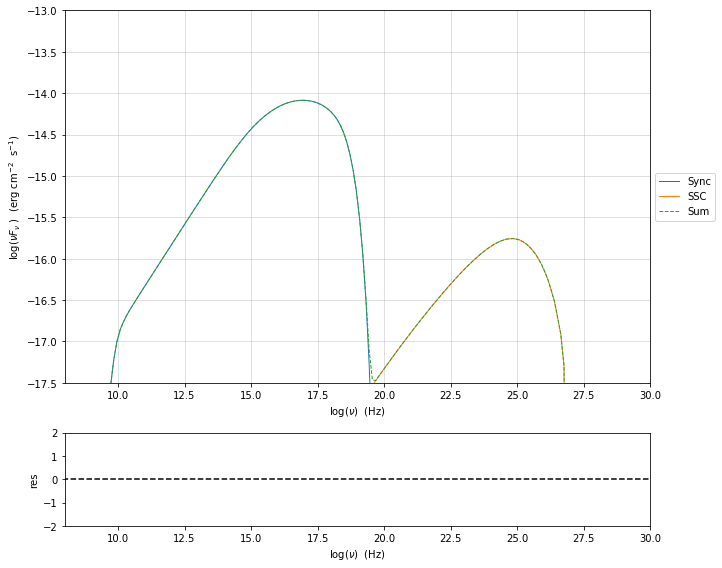

In [18]:
my_jet.eval()
my_plot=my_jet.plot_model()
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

you can access the same plot, but in the rest frame of the black hole, or accretion disk, hence plotting the istropic luminosity,
by simply passing the ``frame`` kw to ``src``

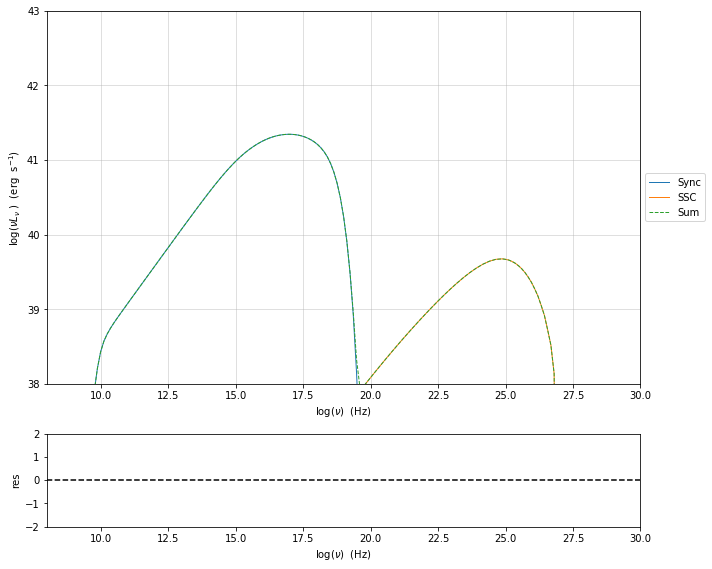

In [19]:
my_plot=my_jet.plot_model(frame='src')
my_plot.rescale(y_max=43,y_min=38,x_min=8)

the ``my_plot`` object returned will be built on the fly by the  ``plot_model`` method

## comparing models on the same plot

to compare the same model after changing a parameter

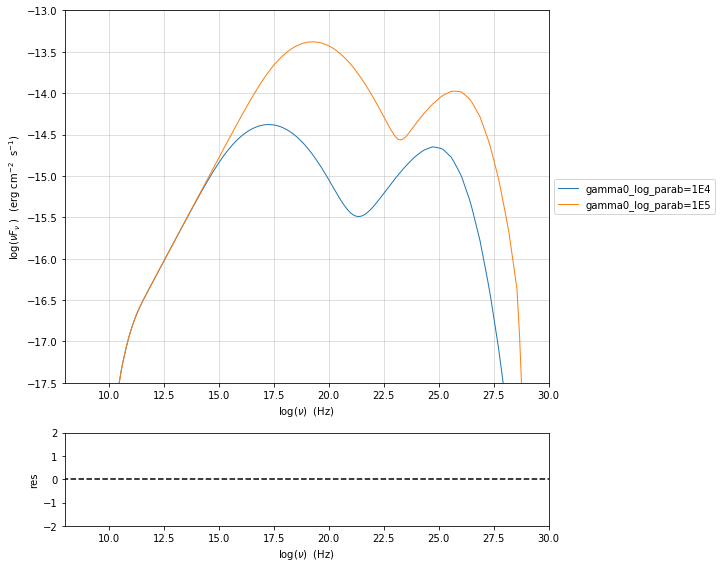

In [20]:
my_jet=Jet(name='test',electron_distribution='lppl',)
my_jet.set_par('B',val=0.2)
my_jet.set_par('gamma0_log_parab',val=5E3)
my_jet.set_par('gmin',val=1E2)
my_jet.set_par('gmax',val=1E8)
my_jet.set_par('R',val=14.5)
my_jet.set_par('N',val=1E3)

my_jet.parameters.gamma0_log_parab.val=1E4
my_jet.eval()
my_plot=my_jet.plot_model(label='gamma0_log_parab=1E4',comp='Sum')
my_jet.set_par('gamma0_log_parab',val=1.0E5)
my_jet.eval()
my_plot=my_jet.plot_model(my_plot,label='gamma0_log_parab=1E5',comp='Sum')
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

## saving a plot

to save the plot

In [21]:
my_plot.save('jet1.png')

## saving and lodaing  a model

In [22]:
my_jet.save_model('test_model.dat')

In [23]:
my_jet_new=Jet.load_model('test_model.dat')

      name             par type           units             val         phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- ------------------ ---------------- ------------------ ----- ------
               R         region_size              cm 15.698970004336019              0.0                 30  True  False
             R_H     region_position              cm              1e+17              0.0               None False  False
               B      magnetic_field               G                0.1              0.0               None False  False
        beam_obj             beaming Lorentz-factor*               10.0           0.0001               None False  False
          z_cosm            redshift                                0.1              0.0               None False  False
               N    electron_density         1 / cm3              100.0              0.0               None False  False
            gmin  low-energy-cut

## switching on/off the particle distribution normalization

In [24]:
my_jet.Norm_distr

1

In [25]:
my_jet.switch_Norm_distr_OFF()

In [26]:
my_jet.switch_Norm_distr_ON()

## setting the particle density  from observed Fluxes or Luminosities

In [27]:
my_jet=Jet(name='test',electron_distribution='lppl')

this is the initial value of N

In [28]:
my_jet.parameters.N.val

100.0

In [29]:

my_jet.set_N_from_nuFnu(nuFnu_obs=1E-14,nu_obs=1E15)

This is the updated value of ``N``, obtained in order to match the given flux at the given frequency

In [30]:
my_jet.get_par_by_name('N').val

271.7733867972609

In [31]:
my_jet.parameters.show_pars()

      name             par type           units             val         phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- ------------------ ---------------- ------------------ ----- ------
               N    electron_density         1 / cm3  271.7733867972609              0.0               None False  False
            gmin  low-energy-cut-off lorentz-factor*                2.0              1.0       1000000000.0 False  False
            gmax high-energy-cut-off lorentz-factor*          1000000.0              1.0 1000000000000000.0 False  False
               s   LE_spectral_slope                                2.0            -10.0               10.0 False  False
               r  spectral_curvature                                0.4            -15.0               15.0 False  False
gamma0_log_parab    turn-over-energy lorentz-factor*            10000.0              1.0       1000000000.0 False  False
               R         region_

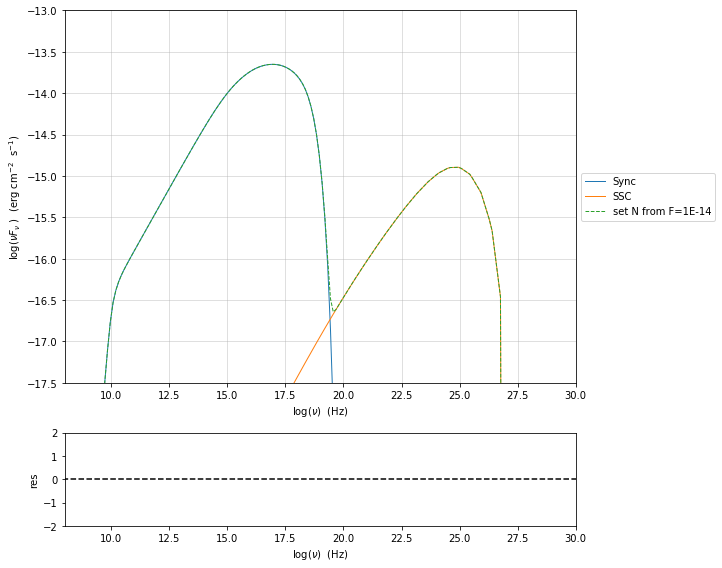

In [32]:
my_jet.eval()
my_plot=my_jet.plot_model(label='set N from F=1E-14')
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

In [33]:
my_jet.set_N_from_nuLnu(nuLnu_src=1E43,nu_src=1E15)

In [34]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='bulk_theta')

In [35]:
my_jet.parameters.show_pars()

      name             par type           units             val         phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- ------------------ ---------------- ------------------ ----- ------
               N    electron_density         1 / cm3              100.0              0.0               None False  False
            gmin  low-energy-cut-off lorentz-factor*                2.0              1.0       1000000000.0 False  False
            gmax high-energy-cut-off lorentz-factor*          1000000.0              1.0 1000000000000000.0 False  False
               s   LE_spectral_slope                                2.0            -10.0               10.0 False  False
               r  spectral_curvature                                0.4            -15.0               15.0 False  False
gamma0_log_parab    turn-over-energy lorentz-factor*            10000.0              1.0       1000000000.0 False  False
               R         region_

In [36]:
my_jet.get_beaming()

19.943844732554165

In [37]:
my_jet.set_par('theta',val=10.)

In [38]:
my_jet.get_beaming()

4.968041140891955

of course setting `beaming_expr=delta` we get the same beaming expression as in the default case

In [39]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='delta')

In [40]:
my_jet.parameters.show_pars()

      name             par type           units             val         phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- ------------------ ---------------- ------------------ ----- ------
               N    electron_density         1 / cm3              100.0              0.0               None False  False
            gmin  low-energy-cut-off lorentz-factor*                2.0              1.0       1000000000.0 False  False
            gmax high-energy-cut-off lorentz-factor*          1000000.0              1.0 1000000000000000.0 False  False
               s   LE_spectral_slope                                2.0            -10.0               10.0 False  False
               r  spectral_curvature                                0.4            -15.0               15.0 False  False
gamma0_log_parab    turn-over-energy lorentz-factor*            10000.0              1.0       1000000000.0 False  False
               R         region_

## accessing individual spectral components

It is possible to access specific spectral components of our model

In [41]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='bulk_theta')
my_jet.eval()

In [42]:

my_jet.list_spectral_components()

Sum
Sync
SSC


the on-screen message is telling us which components have been evaluated. 

In [43]:
Sync=my_jet.get_spectral_component_by_name('Sync')

OR

In [44]:
Sync=my_jet.spectral_components.Sync

and from the ``SED`` object we can extract both the nu and nuFnu array

In [45]:
nu_sync=Sync.SED.nu
nuFnu_sync=Sync.SED.nuFnu

In [46]:
print (nuFnu_sync[::10])

[1.00000000e-120 1.00000000e-120 1.08448642e-022 1.71738565e-018
 4.07807919e-016 1.63686337e-015 6.48484725e-015 2.46700674e-014
 7.28812086e-014 1.24298363e-013 1.12162549e-013 1.42017250e-014
 4.14261886e-028 1.00000000e-120 1.00000000e-120 1.00000000e-120
 1.00000000e-120 1.00000000e-120 1.00000000e-120 1.00000000e-120] erg / (cm2 s)


In [47]:
nu_sync=Sync.SED.nu_src
nuFnu_sync=Sync.SED.nuLnu_src_residuals

In [48]:
my_jet.spectral_components.build_table(restframe='obs')
t_obs=my_jet.spectral_components.table

In [49]:
t_obs[::10]

nu,Sum,Sync,SSC
Hz,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s)
float64,float64,float64,float64
1000000.0,1e-120,1e-120,1e-120
15848931.924611142,1e-120,1e-120,1e-120
251188643.1509582,1.0844864302391386e-22,1.0844864159585182e-22,1.4280620238888498e-30
3981071705.5349693,1.7173856696253947e-18,1.7173856494785146e-18,2.0146879965841637e-26
63095734448.019424,4.078079552134753e-16,4.0780791901431997e-16,3.6199155354751893e-23
1000000000000.0,1.6368645001464381e-15,1.6368633684904028e-15,1.1316560354507247e-21
15848931924611.11,6.484856227306914e-15,6.484847252386628e-15,8.974920286013819e-21
251188643150958.22,2.467012104235855e-14,2.4670067379508708e-14,5.366284984149398e-20


In [50]:
my_jet.spectral_components.build_table(restframe='src')
t_src=my_jet.spectral_components.table

In [51]:
t_src[::10]

nu,Sum,Sync,SSC
Hz,erg / s,erg / s,erg / s
float64,float64,float64,float64
1100000.0,2.7011840560827467e-65,2.7011840560827467e-65,2.7011840560827467e-65
17433825.11707226,2.7011840560827467e-65,2.7011840560827467e-65,2.7011840560827467e-65
276307507.4660541,2.929397454400055e+33,2.929397415825471e+33,3.8574583700258197e+25
4379178876.088467,4.638974788937108e+37,4.638974734516677e+37,5.442043094354434e+29
69405307892.82137,1.1015643465663463e+40,1.1015642487857652e+40,9.77805812879182e+32
1100000000000.0,4.421472289763414e+40,4.421469232952174e+40,3.056811239929309e+34
17433825117072.223,1.751679024719035e+41,1.7516766004278765e+41,2.424291158119413e+35
276307507466054.06,6.663853762125038e+41,6.663839266801599e+41,1.449532343958061e+36


Of cousrse, since these colums have units, you can easily convert the units of the Synchrotron luminostity form erg/s to GeV/s

In [52]:
t_src['Sync'][::10].to('GeV/s')

<Quantity [1.68594648e-62, 1.68594648e-62, 1.82838606e+36, 2.89542029e+40,
           6.87542325e+42, 2.75966403e+43, 1.09331054e+44, 4.15924133e+44,
           1.22873817e+45, 2.09560387e+45, 1.89100054e+45, 2.39433482e+44,
           6.98423368e+30, 1.68594648e-62, 1.68594648e-62, 1.68594648e-62,
           1.68594648e-62, 1.68594648e-62, 1.68594648e-62, 1.68594648e-62] GeV / s>

the table can be easily saved as an ascii file

In [53]:
t_src.write('test_SED.txt',format='ascii.ecsv',overwrite='True')

or in fits format

In [54]:
t_src.write('test_SED.fits',format='fits',overwrite='True')

## Getting an energetic report

In [55]:
my_jet.energetic_report()

-----------------------------------------------------------------------------------------
jet eneregetic report:
     name                par type             units            val           phys. bound. min phys. bound. max  log  frozen
------------- ----------------------------- --------- ---------------------- ---------------- ---------------- ----- ------
          U_e Energy dens. blob rest. frame erg / cm3  0.0017404342430246782             None             None False  False
          U_p Energy dens. blob rest. frame erg / cm3         0.015032764261             None             None False  False
          U_B Energy dens. blob rest. frame erg / cm3 0.00039788735772973844             None             None False  False
      U_Synch Energy dens. blob rest. frame erg / cm3  5.506769532122051e-05             None             None False  False
  U_Synch_DRF Energy dens. disk rest. frame erg / cm3      8.712292317747343             None             None False  False
       U_Disk Energ

In [56]:
my_jet.energetic_report(verbose=False)

In [57]:
my_jet.energetic_dict

{'U_e': 0.0017404342430246782,
 'U_p': 0.015032764261,
 'U_B': 0.00039788735772973844,
 'U_Synch': 5.506769532122051e-05,
 'U_Synch_DRF': 8.712292317747343,
 'U_Disk': 0.0,
 'U_BLR': 0.0,
 'U_DT': 0.0,
 'U_CMB': 0.0,
 'U_Disk_DRF': 0.0,
 'U_BLR_DRF': 0.0,
 'U_DT_DRF': 0.0,
 'U_CMB_DRF': 0.0,
 'L_Sync_rf': 1.7287643525921238e+38,
 'L_SSC_rf': 3.8288790975793374e+36,
 'L_EC_Disk_rf': 0.0,
 'L_EC_BLR_rf': 0.0,
 'L_EC_DT_rf': 0.0,
 'L_EC_CMB_rf': 0.0,
 'L_PP_rf': 0.0,
 'jet_L_Sync': 4.321910881480309e+39,
 'jet_L_SSC': 9.572197743948343e+37,
 'jet_L_EC_Disk': 0.0,
 'jet_L_EC_BLR': 0.0,
 'jet_L_EC_DT': 0.0,
 'jet_L_EC_CMB': 0.0,
 'jet_L_PP': 0.0,
 'jet_L_rad': 4.4176328589197927e+39,
 'jet_L_kin': 4.043042849486073e+42,
 'jet_L_tot': 4.0474604823449925e+42,
 'jet_L_e': 4.097964612089289e+41,
 'jet_L_B': 9.368514312499998e+40,
 'jet_L_p': 3.539561245152144e+42}

In [58]:
my_jet.energetic_report_table.show_in_notebook()

idx,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
0,U_e,Energy dens. blob rest. frame,erg / cm3,0.0017404342430246782,None,None,False,False
1,U_p,Energy dens. blob rest. frame,erg / cm3,0.015032764261,None,None,False,False
2,U_B,Energy dens. blob rest. frame,erg / cm3,0.00039788735772973844,None,None,False,False
3,U_Synch,Energy dens. blob rest. frame,erg / cm3,5.506769532122051e-05,None,None,False,False
4,U_Synch_DRF,Energy dens. disk rest. frame,erg / cm3,8.712292317747343,None,None,False,False
5,U_Disk,Energy dens. blob rest. frame,erg / cm3,0.0,None,None,False,False
6,U_BLR,Energy dens. blob rest. frame,erg / cm3,0.0,None,None,False,False
7,U_DT,Energy dens. blob rest. frame,erg / cm3,0.0,None,None,False,False
8,U_CMB,Energy dens. blob rest. frame,erg / cm3,0.0,None,None,False,False
9,U_Disk_DRF,Energy dens. disk rest. frame,erg / cm3,0.0,None,None,False,False


## External Compton


### Broad Line Region


![EC scheme](jetset_EC_scheme.png)


In [59]:
my_jet=Jet(name='BLR example',electron_distribution='bkn',beaming_expr='bulk_theta')
my_jet.add_EC_component(['EC_BLR','EC_Disk'])
my_jet.show_model()


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: BLR example  

electron distribution:
 type: bkn  
 electron energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  50
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
   name:EC_BLR, state: on
   name:Disk, state: on
   name:EC_Disk, state: on
external fields transformation method: blob

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

    name          par type           units             val         phys. bound. min  phys. bound. max   log  frozen
----------- ----

### change Disk type

the disk type can be set a mono temperature BB  (as in the default case) or as a more realistic multi temperature BB

In [60]:
my_jet.set_par('disk_type',val='MultiBB')


now we set some parameter for the model

In [61]:
my_jet.set_par('L_Disk',val=1E46)
my_jet.set_par('gmax',val=5E4)
my_jet.set_par('gmin',val=2.)
my_jet.set_par('R_H',val=3E17)

my_jet.set_par('p',val=1.5)
my_jet.set_par('p_1',val=3.2)
my_jet.set_par('R',val=15.5)
my_jet.set_par('B',val=1.5)
my_jet.set_par('z_cosm',val=0.6)
my_jet.set_par('BulkFactor',val=20)
my_jet.set_par('theta',val=1)
my_jet.set_par('gamma_break',val=5E2)
my_jet.set_N_from_nuLnu(nu_src=3E13,nuLnu_src=5E45)
my_jet.set_IC_nu_size(100)

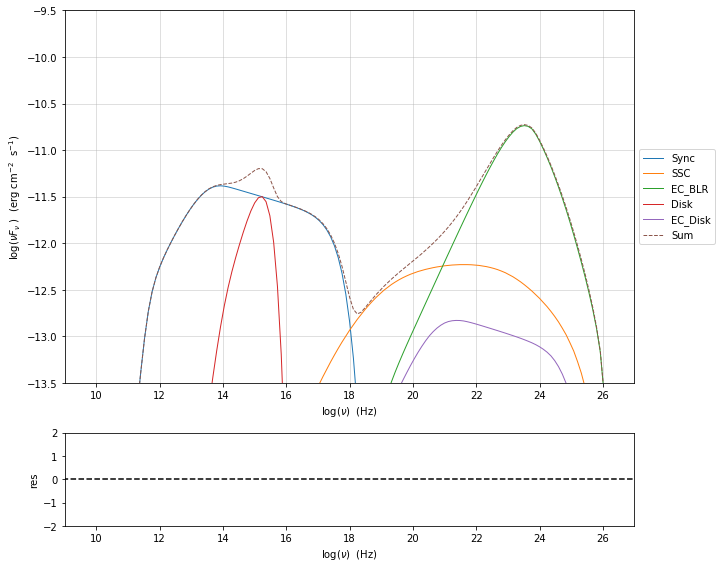

In [62]:
my_jet.eval()
p=my_jet.plot_model(frame='obs')
p.rescale(y_min=-13.5,y_max=-9.5,x_min=9,x_max=27)

### Dusty Torus

In [63]:
my_jet.add_EC_component('DT')
my_jet.show_model()


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: BLR example  

electron distribution:
 type: bkn  
 electron energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 5.000000e+04

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
   name:EC_BLR, state: on
   name:Disk, state: on
   name:EC_Disk, state: on
   name:DT, state: on
external fields transformation method: blob

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

    name          par type           units             val         phys. bound. min  phys. bound. max   log  

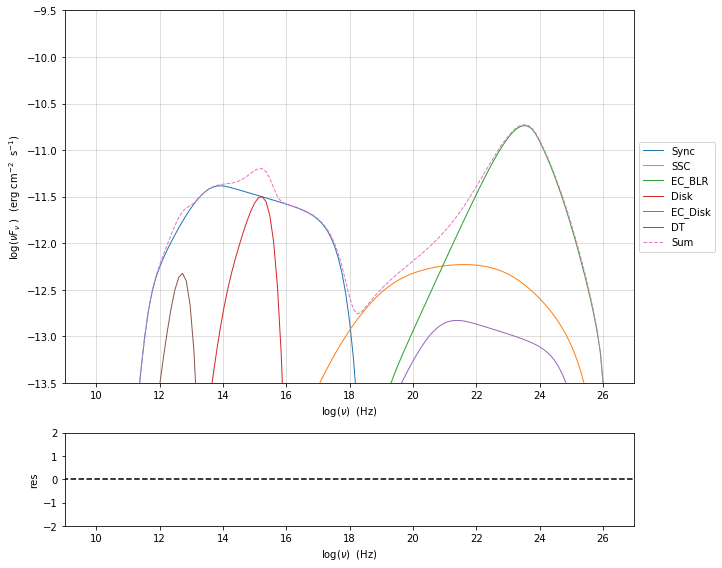

In [64]:
my_jet.eval()
p=my_jet.plot_model()
p.rescale(y_min=-13.5,y_max=-9.5,x_min=9,x_max=27)

In [ ]:
my_jet.add_EC_component('EC_DT')
my_jet.eval()
p=my_jet.plot_model()
p.rescale(y_min=-13.5,y_max=-9.5,x_min=9,x_max=27)

### Changing the external field transformation

Default method, is the transformation of the external photon field from the disk/BH frame to the relativistic blob

In [ ]:
my_jet.set_external_field_transf('blob')

Alternatively, in the case of istropric fields as the CMB or the BLR and DT within the BLR radius, and DT radius, respectively, the it is possible to transform the the electron distribution, moving the blob to the disk/BH frame.

In [ ]:
my_jet.set_external_field_transf('disk')

### External photon field energy density along the jet

In [ ]:
def iso_field_transf(L,R,BulckFactor):
    beta=1.0 - 1/(BulckFactor*BulckFactor)
    return L/(4*np.pi*R*R*3E10)*BulckFactor*BulckFactor*(1+((beta**2)/3))

def external_iso_behind_transf(L,R,BulckFactor):
    beta=1.0 - 1/(BulckFactor*BulckFactor)
    return L/((4*np.pi*R*R*3E10)*(BulckFactor*BulckFactor*(1+beta)**2))


EC seed photon fields, in the Disk  rest frame

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(8,6))
ax=fig.subplots(1)
N=50
G=1
R_range=np.logspace(13,25,N)
y=np.zeros((8,N))
my_jet.set_verbosity(0)
my_jet.set_par('R_BLR_in',1E17)
my_jet.set_par('R_BLR_out',1.1E17)
for ID,R in enumerate(R_range):
    my_jet.set_par('R_H',val=R)
    my_jet.set_external_fields()
    my_jet.energetic_report(verbose=False)
    
    y[1,ID]=my_jet.energetic_dict['U_BLR_DRF']
    y[0,ID]=my_jet.energetic_dict['U_Disk_DRF']
    y[2,ID]=my_jet.energetic_dict['U_DT_DRF']
    
y[4,:]=iso_field_transf(my_jet._blob.L_Disk_radiative*my_jet.parameters.tau_DT.val,my_jet.parameters.R_DT.val,G)
y[3,:]=iso_field_transf(my_jet._blob.L_Disk_radiative*my_jet.parameters.tau_BLR.val,my_jet.parameters.R_BLR_in.val,G)
y[5,:]=external_iso_behind_transf(my_jet._blob.L_Disk_radiative*my_jet.parameters.tau_BLR.val,R_range,G)
y[6,:]=external_iso_behind_transf(my_jet._blob.L_Disk_radiative*my_jet.parameters.tau_DT.val,R_range,G)
y[7,:]=external_iso_behind_transf(my_jet._blob.L_Disk_radiative,R_range,G)

ax.plot(np.log10(R_range),np.log10(y[0,:]),label='Disk')
ax.plot(np.log10(R_range),np.log10(y[1,:]),'-',label='BLR')
ax.plot(np.log10(R_range),np.log10(y[2,:]),label='DT')
ax.plot(np.log10(R_range),np.log10(y[3,:]),'--',label='BLR uniform')
ax.plot(np.log10(R_range),np.log10(y[4,:]),'--',label='DT uniform')
ax.plot(np.log10(R_range),np.log10(y[5,:]),'--',label='BLR 1/R2')
ax.plot(np.log10(R_range),np.log10(y[6,:]),'--',label='DT 1/R2')
ax.plot(np.log10(R_range),np.log10(y[7,:]),'--',label='Disk 1/R2')
ax.set_xlabel('log(R_H) cm')
ax.set_ylabel('log(Uph) erg cm-3 s-1')

ax.legend()


In [ ]:
%matplotlib inline

fig = plt.figure(figsize=(8,6))
ax=fig.subplots(1)

L_Disk=1E45
N=50
G=my_jet.parameters.BulkFactor.val
R_range=np.logspace(15,22,N)
y=np.zeros((8,N))
my_jet.set_par('L_Disk',val=L_Disk)
my_jet._blob.theta_n_int=100
my_jet._blob.l_n_int=100
my_jet._blob.theta_n_int=100
my_jet._blob.l_n_int=100
for ID,R in enumerate(R_range):
    my_jet.set_par('R_H',val=R)
    my_jet.set_par('R_BLR_in',1E17*(L_Disk/1E45)**.5)
    my_jet.set_par('R_BLR_out',1.1E17*(L_Disk/1E45)**.5)
    my_jet.set_par('R_DT',2.5E18*(L_Disk/1E45)**.5)
    my_jet.set_external_fields()
    my_jet.energetic_report(verbose=False)
    
    y[1,ID]=my_jet.energetic_dict['U_BLR']
    y[0,ID]=my_jet.energetic_dict['U_Disk']
    y[2,ID]=my_jet.energetic_dict['U_DT']
    


y[4,:]=iso_field_transf(my_jet._blob.L_Disk_radiative*my_jet.parameters.tau_DT.val,my_jet.parameters.R_DT.val,G)
y[3,:]=iso_field_transf(my_jet._blob.L_Disk_radiative*my_jet.parameters.tau_BLR.val,my_jet.parameters.R_BLR_in.val,G)
y[5,:]=external_iso_behind_transf(my_jet._blob.L_Disk_radiative*my_jet.parameters.tau_BLR.val,R_range,G)
y[6,:]=external_iso_behind_transf(my_jet._blob.L_Disk_radiative*my_jet.parameters.tau_DT.val,R_range,G)
y[7,:]=external_iso_behind_transf(my_jet._blob.L_Disk_radiative,R_range,G)

ax.plot(np.log10(R_range),np.log10(y[0,:]),label='Disk')
ax.plot(np.log10(R_range),np.log10(y[1,:]),'-',label='BLR')
ax.plot(np.log10(R_range),np.log10(y[2,:]),'-',label='DT')
ax.plot(np.log10(R_range),np.log10(y[3,:]),'--',label='BLR uniform')
ax.plot(np.log10(R_range),np.log10(y[4,:]),'--',label='DT uniform')
ax.plot(np.log10(R_range),np.log10(y[5,:]),'--',label='BLR 1/R2')
ax.plot(np.log10(R_range),np.log10(y[6,:]),'--',label='DT 1/R2')
ax.plot(np.log10(R_range),np.log10(y[7,:]),'--',label='Disk 1/R2')
ax.axvline(np.log10( my_jet.parameters.R_DT.val ))
ax.axvline(np.log10( my_jet.parameters.R_BLR_out.val))

ax.set_xlabel('log(R_H) cm')
ax.set_ylabel('log(Uph`) erg cm-3 s-1')

ax.legend()


### IC against the CMB